In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# !pip install folium
# !pip install geopy

     |████████████████████████████████| 118 kB 3.7 MB/s eta 0:00:01


In [7]:
import folium # used for visualizing geo-spatial data
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN as dbscan
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [130]:
df = pd.read_excel("Datathon_Data_Sample.xlsx")

In [10]:
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,MINUTE,STREET1,STREET2,OFFSET,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,52,BLOOR ST W,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,52,BLOOR ST W,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,15,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,15,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,40,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [14]:
df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'MINUTE', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INDEX_           50 non-null     int64  
 1   ACCNUM           50 non-null     int64  
 2   YEAR             50 non-null     int64  
 3   DATE             50 non-null     object 
 4   TIME             50 non-null     int64  
 5   HOUR             50 non-null     int64  
 6   MINUTE           50 non-null     int64  
 7   STREET1          50 non-null     object 
 8   STREET2          50 non-null     object 
 9   OFFSET           50 non-null     object 
 10  ROAD_CLASS       50 non-null     object 
 11  DISTRICT         50 non-null     object 
 12  WARDNUM          50 non-null     object 
 13  DIVISION         50 non-null     object 
 14  LATITUDE         50 non-null     float64
 15  LONGITUDE        50 non-null     float64
 16  LOCCOORD         50 non-null     object 
 17  ACCLOC           5

In [18]:
df.STREET1.value_counts()

BIRCHMOUNT RD       9
STEELES AVE E       6
WILLOWDALE AVE      6
BLOOR ST W          4
EGLINTON AVE E      3
BLACK CREEK DR      3
ST CLAIR AVE W      3
MORNINGSIDE AVE     2
941 PROGRESS AVE    2
ISLINGTON AVE       2
STEELES AVE W       2
2423 KEELE ST       2
OSSINGTON AVE       2
DUNDAS ST E         2
SYMINGTON AVE       2
Name: STREET1, dtype: int64

In [25]:
number_of_records = df.shape[0]

In [27]:
for (columnName, columnData) in df.iteritems():
    print('Column Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    count = 0
    for i in columnData.values:
        if i == '<Null>':
            count = count + 1
    
    print("Number of nulls: ", count)
    print("Percentage of nulls: ", (count/number_of_records)*100)
    print("----------------------------- \n")

Column Name :  INDEX_
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  ACCNUM
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  YEAR
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  DATE
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  TIME
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  HOUR
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  MINUTE
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  STREET1
Number of nulls:  0
Percentage of nulls:  0.0
----------------------------- 

Column Name :  STREET2
Number of nulls:  4
Percentage of nulls:  8.0
----------------------------- 

Column Name :  OFFSET
Number of nulls:  50
Percentage of nulls:  100.0
----------------------------- 

Col

In [131]:
# dropping some variables
# offset has all nulls
# Accloc is more or less same as Loccord
# Fatal_no has all nulls
# Rest removed: cu=yclist, truck, etc. have all nulls
# Initdir -- ?? not sure about removing this, is direction important?
# MANOEUVER -- same as above



imp_df = df.drop(['OFFSET', 'ACCLOC', 'TIME', 'MINUTE', 'PEDTYPE', 'CYCLISTYPE', 
                  'CYCACT', 'CYCCOND', 'CYCLIST', 'TRUCK', 'TRSN_CITY_VEH',
                 'EMERG_VEH', 'DATE'], axis = 1)

In [132]:
# Extracting date
import datetime

imp_df['DATE'] = df['DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f')).date())
# print('Date:', date_time_obj.date())
# print('Time:', date_time_obj.time())
# print('Date-time:', date_time_obj)

In [129]:
imp_df.head()

,INDEX_,ACCNUM,YEAR,HOUR,STREET1,STREET2,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,Cluster,DATE
0,3387730,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1,-1,2006-03-11
1,3387731,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2,-1,2006-03-11
2,3388101,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3,-1,2006-03-11
3,3388102,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4,-1,2006-03-11
4,3387793,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5,-1,2006-03-12


## Geo-spatial map and DBScan

 DBSCAN groups points that are closely packed together and marks points outside of these groups as noise. Therefore, using this algorithm, locations in which a high density of accidents take place will be highlighted as clusters.

In [91]:
from sklearn.cluster import DBSCAN as dbscan
from geopy.distance import great_circle

def greatcircle(x,y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

eps = 100 #distance in meters
min_samples = 10

df_dbc = imp_df

loc = df_dbc[['LATITUDE','LONGITUDE']]

dbc = dbscan(eps = 0.8, min_samples = 1, metric=greatcircle).fit(loc)

labels = dbc.labels_
unique_labels = np.unique(dbc.labels_)

print(unique_labels)

df_dbc['Cluster'] = labels

location = df_dbc['LATITUDE'].mean(), df_dbc['LONGITUDE'].mean()

m = folium.Map(location=location,zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c', '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i in range(0,len(df_dbc)):
    colouridx = df_dbc['Cluster'].iloc[i]
    if colouridx == -1:
        print("Something went wrong")
        pass
    else:
        col = clust_colours[colouridx%len(clust_colours)]
        folium.CircleMarker([df_dbc['LATITUDE'].iloc[i],df_dbc['LONGITUDE'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [88]:
labels

array([ 0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15])

In [92]:
df_dbc

,INDEX_,ACCNUM,YEAR,HOUR,STREET1,STREET2,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,Cluster
0,3387730,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1,0
1,3387731,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2,0
2,3388101,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3,1
3,3388102,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4,1
4,3387793,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5,2
5,3387794,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),6,2
6,3387795,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),7,2
7,3388371,892913,2006,19,OSSINGTON AVE,DUNDAS ST W,Major Arterial,Toronto and East York,"9,11,10",14,...,<Null>,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),8,3
8,3388372,892913,2006,19,OSSINGTON AVE,DUNDAS ST W,Major Arterial,Toronto and East York,"9,11,10",14,...,<Null>,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),9,3
9,3389258,893251,2006,15,ISLINGTON AVE,DIXON RD,Major Arterial,Etobicoke York,"1,2",23,...,<Null>,<Null>,<Null>,<Null>,<Null>,D23,6,Kingsview Village-The Westway (6),10,4


## K Modes clustering for categorical data

In [105]:
import pandas as pd
import numpy as np
#!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
k_modes_df = imp_df.replace(['<Null>'],'unknown')

In [134]:
k_modes_df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'HOUR', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'DIVISION', 'LATITUDE', 'LONGITUDE', 'LOCCOORD',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDACT', 'PEDCOND', 'PEDESTRIAN',
       'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'DATE'],
      dtype='object')

In [135]:
k_modes_df = k_modes_df.drop(['INDEX_', 'ACCNUM', 'YEAR', 'HOUR', 'STREET1', 'STREET2',
                              'DISTRICT', 'LATITUDE', 'LONGITUDE', 'WARDNUM', 'DIVISION',
                             'HOOD_ID', 'ObjectId'], axis = 1)

In [112]:
k_modes_df = imp_df.drop([], axis = 1)

In [136]:
k_modes_df

,ROAD_CLASS,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,...,MOTORCYCLE,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,NEIGHBOURHOOD,DATE
0,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,...,unknown,unknown,unknown,Yes,unknown,unknown,unknown,D11,High Park North (88),2006-03-11
1,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,...,unknown,unknown,unknown,Yes,unknown,unknown,unknown,D11,High Park North (88),2006-03-11
2,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,...,Yes,unknown,unknown,Yes,Yes,unknown,unknown,D42,Rouge (131),2006-03-11
3,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,...,Yes,unknown,unknown,Yes,Yes,unknown,unknown,D42,Rouge (131),2006-03-11
4,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,...,unknown,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12
5,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,30 to 34,...,unknown,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12
6,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,40 to 44,...,unknown,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12
7,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,30 to 34,...,unknown,unknown,unknown,Yes,unknown,Yes,unknown,D14,Trinity-Bellwoods (81),2006-03-12
8,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,25 to 29,...,unknown,unknown,unknown,Yes,unknown,Yes,unknown,D14,Trinity-Bellwoods (81),2006-03-12
9,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,40 to 44,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,D23,Kingsview Village-The Westway (6),2006-03-15


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 548.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 468.0
Run 1, iteration: 2/100, moves: 7, cost: 454.0
Run 1, iteration: 3/100, moves: 2, cost: 452.0
Run 1, iteration: 4/100, moves: 0, cost: 452.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

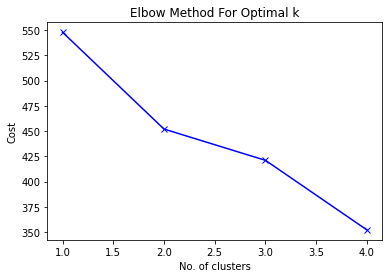

In [137]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(k_modes_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [139]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(k_modes_df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 413.0
Run 1, iteration: 2/100, moves: 0, cost: 413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 22, cost: 412.0
Run 2, iteration: 2/100, moves: 2, cost: 412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 429.0
Run 4, iteration: 2/100, moves: 8, cost: 406.0
Run 4, iteration: 3/100, moves: 0, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 431.0
Run 5, iteration: 2/100, moves: 0, cost: 431.0
Best run was number 4


array([0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0], dtype=uint16)

In [141]:
k_modes_df['k_modes_cluster'] = clusters

In [142]:
k_modes_df

,ROAD_CLASS,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,NEIGHBOURHOOD,DATE,k_modes_cluster
0,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,...,unknown,unknown,Yes,unknown,unknown,unknown,D11,High Park North (88),2006-03-11,0
1,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,...,unknown,unknown,Yes,unknown,unknown,unknown,D11,High Park North (88),2006-03-11,1
2,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,...,unknown,unknown,Yes,Yes,unknown,unknown,D42,Rouge (131),2006-03-11,2
3,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,...,unknown,unknown,Yes,Yes,unknown,unknown,D42,Rouge (131),2006-03-11,2
4,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,...,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12,0
5,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,30 to 34,...,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12,1
6,Major Arterial,Mid-Block,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,40 to 44,...,unknown,unknown,unknown,unknown,Yes,unknown,D41,Eglinton East (138),2006-03-12,1
7,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,30 to 34,...,unknown,unknown,Yes,unknown,Yes,unknown,D14,Trinity-Bellwoods (81),2006-03-12,0
8,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,25 to 29,...,unknown,unknown,Yes,unknown,Yes,unknown,D14,Trinity-Bellwoods (81),2006-03-12,1
9,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,40 to 44,...,unknown,unknown,unknown,unknown,unknown,unknown,D23,Kingsview Village-The Westway (6),2006-03-15,0


In [144]:
k_modes_df.to_csv("Clustered_KSI.csv")

In [145]:
imp_df

,INDEX_,ACCNUM,YEAR,HOUR,STREET1,STREET2,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,DATE,k_modes_cluster
0,3387730,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1,2006-03-11,0
1,3387731,892658,2006,8,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,4,11,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2,2006-03-11,1
2,3388101,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3,2006-03-11,2
3,3388102,892810,2006,9,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,25,42,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4,2006-03-11,2
4,3387793,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5,2006-03-12,0
5,3387794,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),6,2006-03-12,1
6,3387795,892682,2006,2,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,"21,20",41,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),7,2006-03-12,1
7,3388371,892913,2006,19,OSSINGTON AVE,DUNDAS ST W,Major Arterial,Toronto and East York,"9,11,10",14,...,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),8,2006-03-12,0
8,3388372,892913,2006,19,OSSINGTON AVE,DUNDAS ST W,Major Arterial,Toronto and East York,"9,11,10",14,...,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),9,2006-03-12,1
9,3389258,893251,2006,15,ISLINGTON AVE,DIXON RD,Major Arterial,Etobicoke York,"1,2",23,...,<Null>,<Null>,<Null>,<Null>,D23,6,Kingsview Village-The Westway (6),10,2006-03-15,0


In [146]:
imp_df.to_csv("Clustered_KSI.csv")

## Factor Analysis

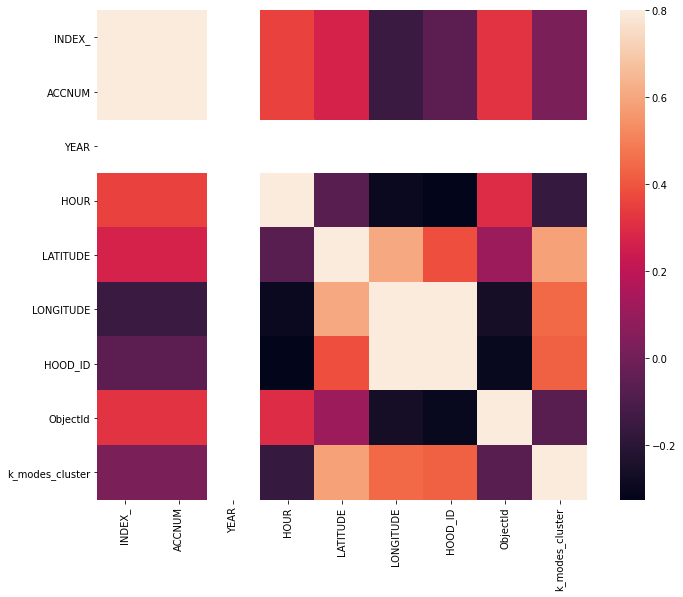

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = imp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

In [149]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 40 kB 2.1 MB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=8ef56e7cd710742c4d76bf6aaf839ff512b3accec18c1be46aafcb5b27e7129b
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/b1/d4/b5/9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


### Factor analysis for mixed (categorical and numeric) data
FAMD does the analysis with a combination of PCA and MCA techniques. MCA stands for Multiple Correspondence Analysis which is suitable for multiple categorical factors specifically. If the dataset is grouped by different features with a blend of continuous and categorical values, another technique named MFA (Multiple Factor Analysis) can be deployed.

In [150]:
factor_analysis_df = k_modes_df.drop(['DATE', 'k_modes_cluster'], axis = 1)

In [157]:
imp_df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'HOUR', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'DIVISION', 'LATITUDE', 'LONGITUDE', 'LOCCOORD',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDACT', 'PEDCOND', 'PEDESTRIAN',
       'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'DATE', 'k_modes_cluster'],
      dtype='object')

In [158]:
factor_analysis_df = imp_df.drop(['INDEX_', 'ACCNUM', 'YEAR', 'DATE',
                                  'ObjectId', 'k_modes_cluster', 'HOOD_ID', 'DIVISION'], axis=1)

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (16.13% inertia)', ylabel='Component 1 (10.70% inertia)'>

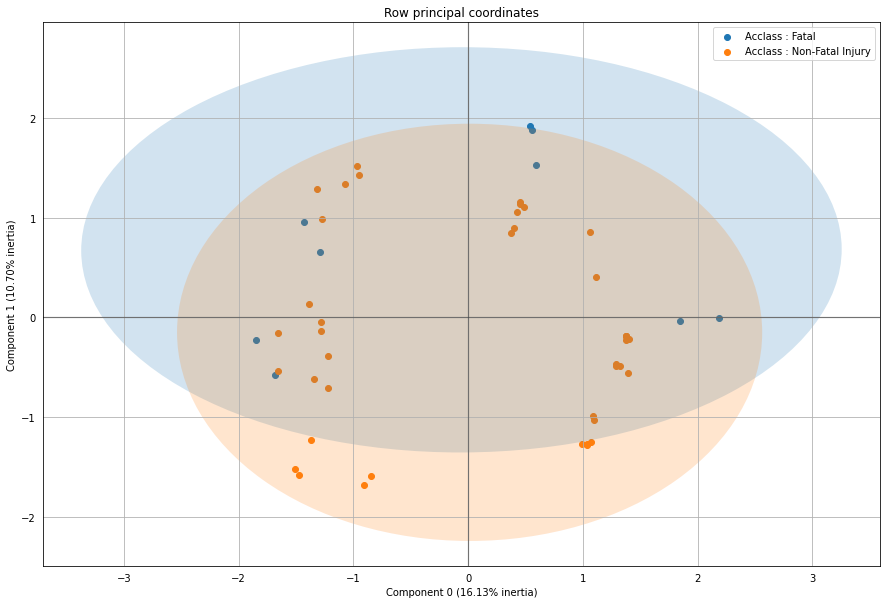

In [159]:
#!pip install prince
from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

famd.fit(factor_analysis_df)
famd.transform(factor_analysis_df)
famd.plot_row_coordinates(factor_analysis_df,figsize=(15, 10),color_labels=['Acclass : {}'.format(t) for t in factor_analysis_df['ACCLASS']] )


In [167]:
quali.var = get_famd_var(famd, "quali.var")
print(quali.var)
head(quali.var.coord) # coordinates of qualitative variables

NameError: name 'get_famd_var' is not defined

In [168]:
factor_analysis_df.to_csv("forRanalysis.csv")